In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [26]:
def analyze_text_features(file_path, num_samples=1000, max_features=500, ngram_range=(1, 2)):
    """
    Analyzes text features from a CSV file and calculates mean, spread, and distance between AI-generated and human-written text.

    Args:
        file_path (str): The path to the CSV file.
        num_samples (int): The number of samples to consider from each category (AI and human).
        max_features (int): The maximum number of features to extract using TF-IDF.
        ngram_range (tuple): The range of n-grams to consider for TF-IDF.

    Returns:
        tuple: A tuple containing the dataframe, ai and human features and mean and spread of AI and human text features, and the distance between their means.
    """
    df = pd.read_csv(file_path, nrows=10000)
    df.rename(columns={'text': 'text', 'label': 'generated'}, inplace=True)
    df = df.dropna()

    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range, stop_words='english')
    vector_data = vectorizer.fit_transform(df['text']).toarray()

    ai_feat = vector_data[df["generated"] == 1][:num_samples]
    human_feat = vector_data[df["generated"] == 0][:num_samples]

    ai_mean = ai_feat.mean(axis=0)
    human_mean = human_feat.mean(axis=0)

    ai_spread = ai_feat.std(axis=0)
    human_spread = human_feat.std(axis=0)

    distance = np.linalg.norm(ai_mean - human_mean)

    return df, vectorizer, ai_feat, human_feat, ai_mean, vector_data, human_mean, ai_spread, human_spread, distance

df, vectorizer, ai_feat, human_feat, ai_mean, vector_data, human_mean, ai_spread, human_spread, distance = analyze_text_features('../Datasets/final_test.csv')
    
print("Ai text feature mean:", ai_mean)
print("Human text feature mean:", human_mean)
print()
print("Ai text feature spread:", ai_spread)
print("Human text feature spread:", human_spread)
print()
print("Distance between human and AI means:", distance)

Ai text feature mean: [0.00974166 0.01618979 0.01873089 0.01063201 0.00466686 0.00399039
 0.01536335 0.00554407 0.02483667 0.00702931 0.00641509 0.00822225
 0.02210782 0.00571186 0.01329269 0.01136611 0.00795248 0.01057627
 0.00629822 0.00198667 0.00208605 0.00719368 0.00376031 0.00919112
 0.01361982 0.0005716  0.0037777  0.01288323 0.00904428 0.00109112
 0.01462022 0.00752254 0.00532609 0.00216682 0.00388686 0.00233607
 0.00418466 0.00823719 0.01876099 0.00352194 0.00567254 0.00488075
 0.00420498 0.00316193 0.00959626 0.02673951 0.01065747 0.008709
 0.0211383  0.01769371 0.02475174 0.00476209 0.00748327 0.00432266
 0.00355162 0.00779952 0.01213898 0.03312997 0.00507101 0.0247131
 0.00630596 0.01965168 0.02208782 0.00432599 0.00665025 0.00697339
 0.00354548 0.00379089 0.00756502 0.00362808 0.01172358 0.00621465
 0.01409886 0.01526317 0.00703211 0.00789597 0.00642578 0.00393343
 0.00320616 0.00672563 0.01485715 0.00275855 0.00889961 0.00610293
 0.0027467  0.0020011  0.04194332 0.0063469

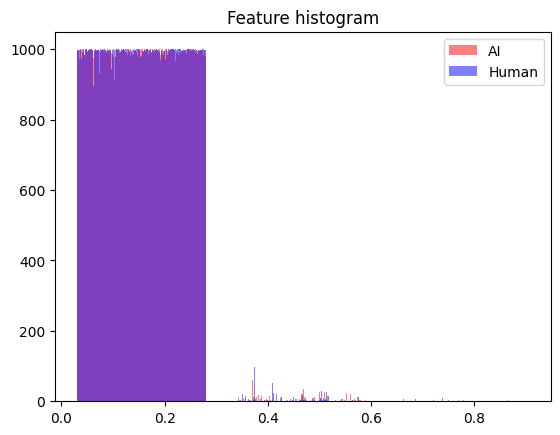

In [27]:
plt.hist(ai_feat, bins=3, alpha=0.5, label='AI', color=('red',)*500)
plt.hist(human_feat, bins=3, alpha=0.5, label='Human', color=('blue',)*500)
plt.legend(loc='upper right')
plt.title("Feature histogram")
plt.show()

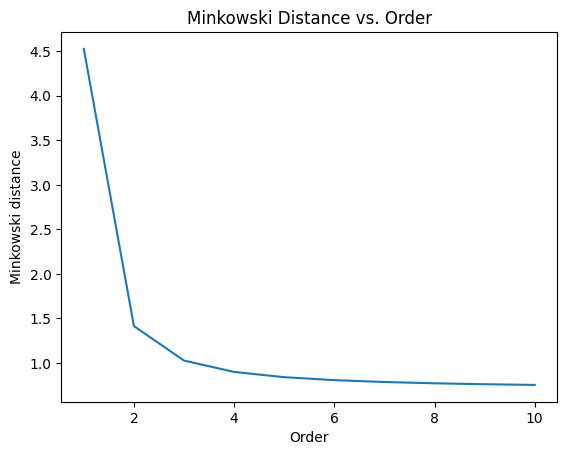

In [7]:
def calculate_minkowski_distances(ai_feat_vec, human_feat_vec, max_order=10):
    """
    Calculates Minkowski distances between two feature vectors for different orders.

    Args:
        ai_feat_vec (numpy.ndarray): The feature vector for AI-generated text.
        human_feat_vec (numpy.ndarray): The feature vector for human-written text.
        max_order (int): The maximum order to consider for Minkowski distance.

    Returns:
        list: A list of Minkowski distances for orders from 1 to max_order.
    """
    dists = []
    for r in range(1, max_order + 1):
        distance = np.linalg.norm(ai_feat_vec - human_feat_vec, ord=r)
        dists.append(distance)
    return dists

dists = calculate_minkowski_distances(ai_feat[0], human_feat[0])

plt.plot(range(1, 11), dists)
plt.title("Minkowski Distance vs. Order")
plt.xlabel("Order")
plt.ylabel("Minkowski distance")
plt.show()

In [28]:
def split_data(X, y, test_size=0.3):
    """
    Splits data into training and testing sets.

    Args:
        X (numpy.ndarray or pandas.DataFrame): The feature data.
        y (numpy.ndarray or pandas.Series): The target variable.
        test_size (float): The proportion of the dataset to include in the test split.

    Returns:
        tuple: A tuple containing the training and testing data (X_train, X_test, y_train, y_test).
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(vector_data, df["generated"])   

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7000, 500)
X_test shape: (3000, 500)
y_train shape: (7000,)
y_test shape: (3000,)


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.score(X_test, y_test)

0.9383333333333334

In [31]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

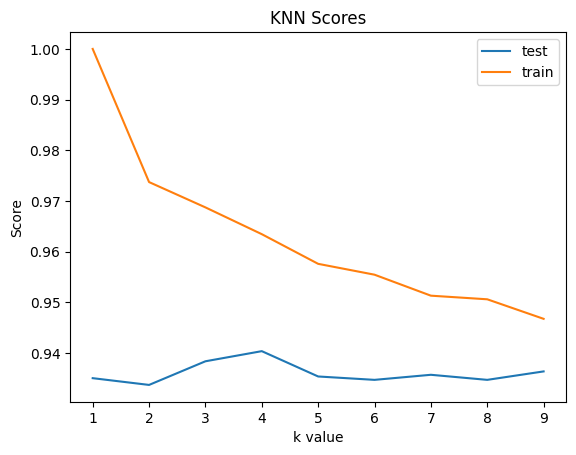

In [32]:
def evaluate_knn(X_train, X_test, y_train, y_test, max_k=10):
    """
    Evaluates K-Nearest Neighbors (KNN) classifier for different values of k.

    Args:
        X_train (numpy.ndarray or pandas.DataFrame): The training feature data.
        X_test (numpy.ndarray or pandas.DataFrame): The testing feature data.
        y_train (numpy.ndarray or pandas.Series): The training target variable.
        y_test (numpy.ndarray or pandas.Series): The testing target variable.
        max_k (int): The maximum value of k to consider.

    Returns:
        tuple: A tuple containing the test and train scores for different values of k.
    """
    test_knn_scores = []
    train_knn_scores = []

    for i in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        test_knn_scores.append(knn.score(X_test, y_test))
        train_knn_scores.append(knn.score(X_train, y_train))

    return test_knn_scores, train_knn_scores

test_knn_scores, train_knn_scores = evaluate_knn(X_train, X_test, y_train, y_test)

plt.plot(range(1, 10), test_knn_scores)
plt.plot(range(1, 10), train_knn_scores)
plt.legend(["test", "train"])
plt.title("KNN Scores")
plt.xlabel("k value")
plt.ylabel("Score")
plt.show()

In [37]:
def print_stats(x_vals, y_vals):
    """
    Evaluates a classifier's performance using confusion matrix, precision, recall, and F1 score.

    Args:
        y_true (numpy.ndarray or pandas.Series): The true target values.
        y_pred (numpy.ndarray or pandas.Series): The predicted target values.

    Returns:
        tuple: A tuple containing the confusion matrix, precision, recall, and F1 score.
    """
    conf_matrix = confusion_matrix(y_vals, knn.predict(x_vals))

    print("Confusion Matrix:")
    print(conf_matrix)
    
    print("Precision:", precision_score(y_vals, knn.predict(x_vals)))
    print("Recall:", recall_score(y_vals, knn.predict(x_vals)))
    print("F1 Score:", f1_score(y_vals, knn.predict(x_vals)))

In [42]:
print("Training Metrics")
print_stats(X_train, y_train)
print()
print("Testing Metrics")
print_stats(X_test, y_test)

Training Metrics
Confusion Matrix:
[[4340  123]
 [  96 2441]]
Precision: 0.9520280811232449
Recall: 0.9621600315333071
F1 Score: 0.9570672417173103

Testing Metrics
Confusion Matrix:
[[1800  110]
 [  75 1015]]
Precision: 0.9022222222222223
Recall: 0.9311926605504587
F1 Score: 0.9164785553047404


In [39]:
test = """One option to consider is to put articles behind a 'free paywall' and login so that AI cannot scrape the articles. This is a move that some publishers are considering and a move that academic organisations may consider; although this may seem contrary to open science prin- 13 ciples."""

knn.predict(vectorizer.transform([test]))

array([1], dtype=int64)